In [127]:
from matplotlib.pyplot import scatter, title, xlabel, ylabel, figure, title, legend, bar
from seaborn import set
from pandas import read_csv
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

In [128]:
# Read csv file 
packages_df = read_csv('datasets/Packstücke.csv', sep=';', header=0)  

# Show first ten rows of dataframe 
packages_df.head(10)

,Package No,Shipment No,Gross Weight (kg),Width (cm),Height (cm),Length (cm)
0,1007530-2011-03239,1000088,23,35,30,35
1,1007530-2011-03241,1000310,150,60,55,80
2,1007530-2011-03242,1000346,"0,5",14,15,19
3,1007530-2011-03243,1000456,"1,5",20,20,29
4,1007530-2011-03244,1000796,1,10,10,10
5,1007530-2011-03245,1000957,75,82,81,120
6,1007530-2011-03246,1000957,41,80,34,120
7,1007530-2011-03247,1001184,1.340,220,112,406
8,1007530-2011-03249,1001408,"0,5",20,20,29
9,1007530-2011-03250,1001563,5,45,35,45


In [129]:
# Show data types of columns
packages_df.dtypes

Package No           object
Shipment No           int64
Gross Weight (kg)    object
Width (cm)           object
Height (cm)           int64
Length (cm)           int64
dtype: object

In [130]:
# Replace ',' with '.' (us standard)
packages_df["Gross Weight (kg)"] = packages_df.apply(lambda row: str(row["Gross Weight (kg)"]).replace(".", "").replace(",", "."), axis=1)
packages_df["Width (cm)"] = packages_df.apply(lambda row: str(row["Width (cm)"]).replace(".", "").replace(",", "."), axis=1)

# Convert to correct data type
packages_df[["Gross Weight (kg)", "Width (cm)"]] = packages_df[["Gross Weight (kg)", "Width (cm)"]].astype(float)
packages_df[["Height (cm)", "Length (cm)"]] = packages_df[["Height (cm)", "Length (cm)"]].astype(int)
packages_df[["Package No", "Shipment No"]] = packages_df[["Package No", "Shipment No"]].astype(str)

# Calculate volume of each row
packages_df["Volume (m³)"] = packages_df.apply(lambda row: row["Width (cm)"] * row["Height (cm)"] * row["Length (cm)"] / 1000000, axis=1)

# Drop not needed cols
x = packages_df.drop(["Package No", "Shipment No"], axis=1)

# Show first ten rows of dataframe 
x.head(10)

,Gross Weight (kg),Width (cm),Height (cm),Length (cm),Volume (m³)
0,23.0,35.0,30,35,0.036750
1,150.0,60.0,55,80,0.264000
2,0.5,14.0,15,19,0.003990
3,1.5,20.0,20,29,0.011600
4,1.0,10.0,10,10,0.001000
5,75.0,82.0,81,120,0.797040
6,41.0,80.0,34,120,0.326400
7,1340.0,220.0,112,406,10.003840
8,0.5,20.0,20,29,0.011600
9,5.0,45.0,35,45,0.070875


Text(0, 0.5, 'Volume (m³)')

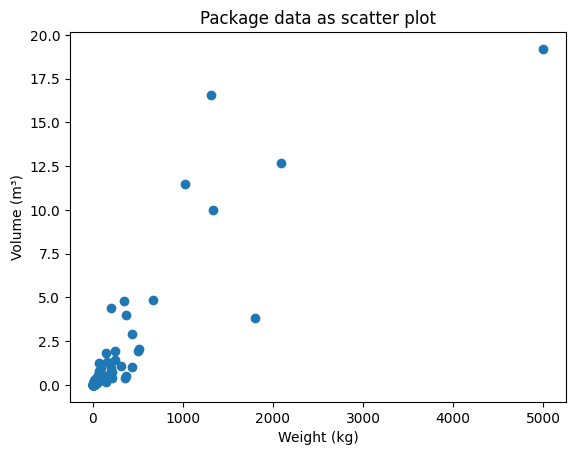

In [131]:
# Plot data as scatter  
scatter(x["Gross Weight (kg)"].to_numpy(), x["Volume (m³)"].to_numpy())
title("Package data as scatter plot")
xlabel("Weight (kg)")
ylabel("Volume (m³)")

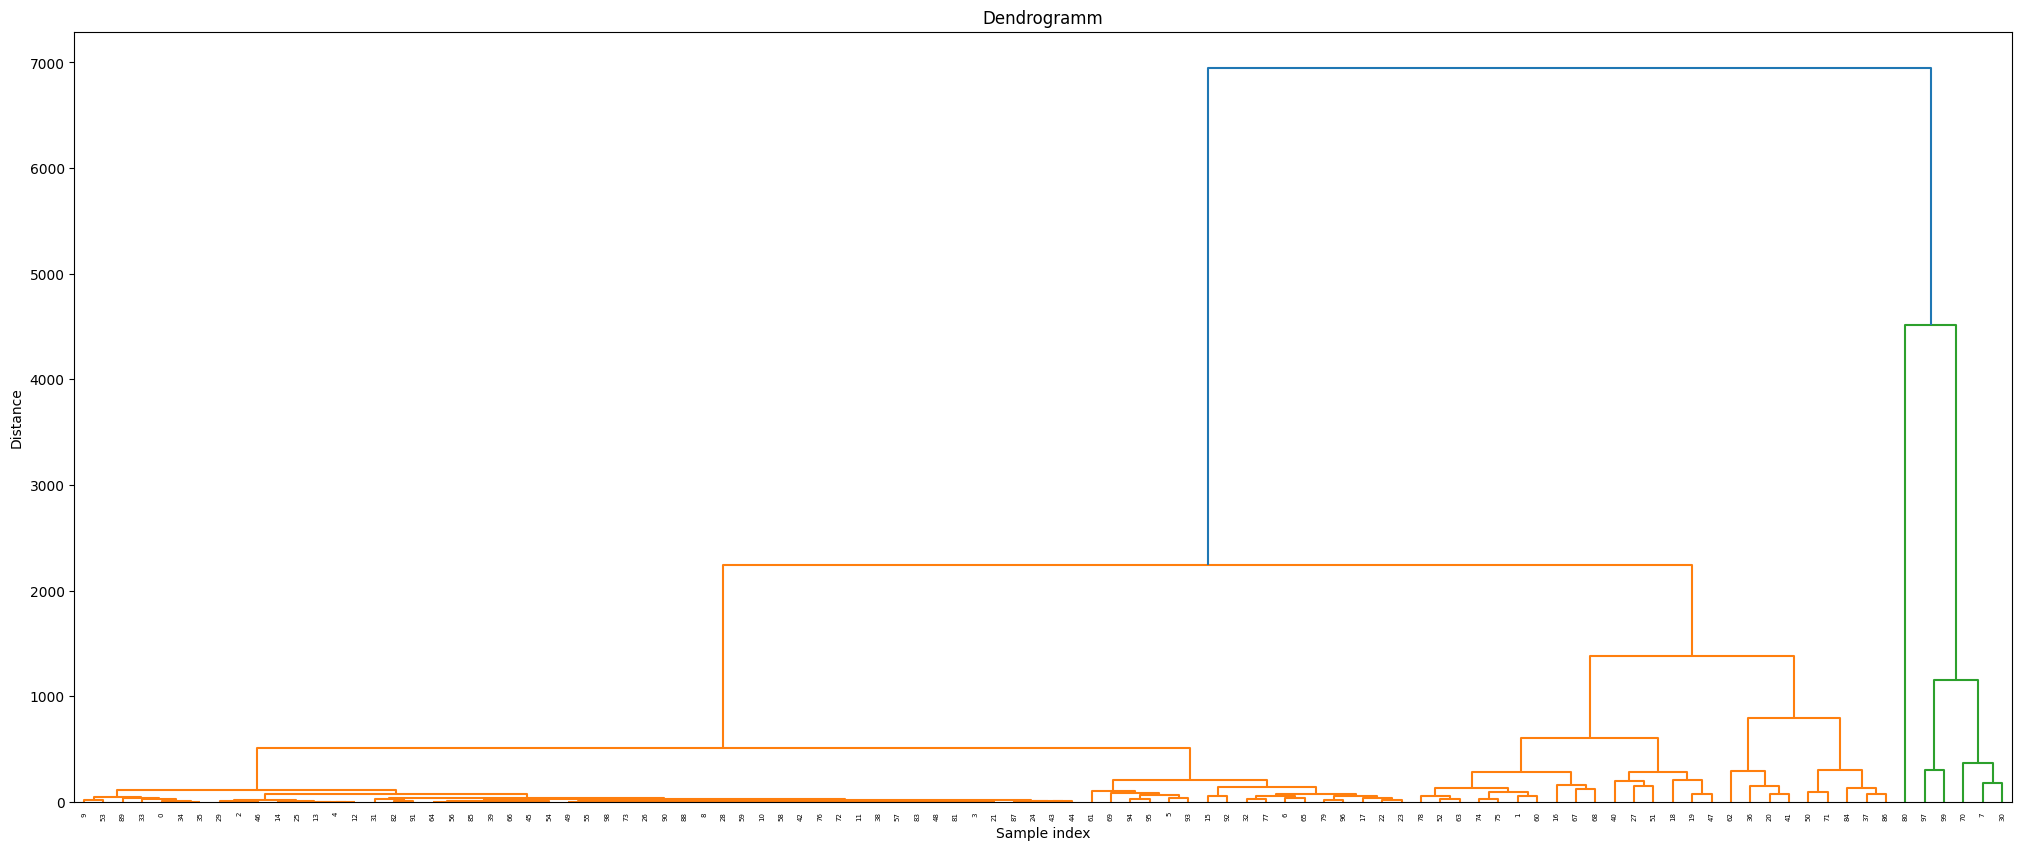

In [132]:
figure(figsize=(25, 10))
title("Dendrogramm")
xlabel("Sample index")
ylabel("Distance")
dend = dendrogram(linkage(x, method="ward"))

In [133]:
scaler = preprocessing.StandardScaler()
scaled_x = scaler.fit_transform(x)

cluster_euc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
cluster_l1 = AgglomerativeClustering(n_clusters=3, affinity="l1", linkage="average")
cluster_l2 = AgglomerativeClustering(n_clusters=3, affinity="l2", linkage="average")
cluster_man = AgglomerativeClustering(n_clusters=3, affinity="manhattan", linkage="average")
cluster_cos = AgglomerativeClustering(n_clusters=3, affinity="cosine", linkage="average")
cluster_pre = AgglomerativeClustering(n_clusters=3, affinity="precomputed", linkage="average")

y_cluster_euc = cluster_euc.fit_predict(scaled_x)
y_cluster_l1 = cluster_l1.fit_predict(scaled_x)
y_cluster_l2 = cluster_l2.fit_predict(scaled_x)
y_cluster_man = cluster_man.fit_predict(scaled_x)
y_cluster_cos = cluster_cos.fit_predict(scaled_x)
# y_cluster_pre = cluster_pre.fit_predict(scaled_x)

score_euc = silhouette_score(scaled_x, y_cluster_euc, metric="euclidean")
score_l1 = silhouette_score(scaled_x, y_cluster_l1, metric="l1")
score_l2 = silhouette_score(scaled_x, y_cluster_l2, metric="l2")
score_man = silhouette_score(scaled_x, y_cluster_man, metric="manhattan")
score_cos = silhouette_score(scaled_x, y_cluster_cos, metric="cosine")
# score_pre = silhouette_score(scaled_x, y_cluster_pre, metric="precomputed")

<BarContainer object of 5 artists>

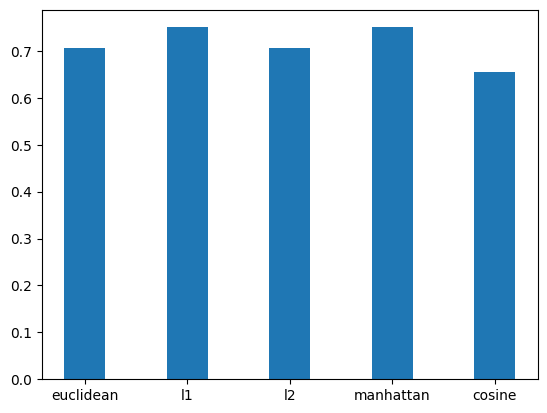

In [134]:
silhouette_scores = {
    "euclidean": score_euc,
    "l1": score_l1,
    "l2": score_l2,
    "manhattan": score_man,
    "cosine": score_cos,
    # "precomputed": score_pre,
}
bar(list(silhouette_scores.keys()), list(silhouette_scores.values()), width=0.4)


In [135]:
silhouette_scores.values()

dict_values([0.7061803024721713, 0.750332391238262, 0.7061803024721713, 0.750332391238262, 0.6546611919139258])

In [136]:
kmeans = KMeans(n_clusters=3) 
y_kmeans = kmeans.fit_predict(scaled_x)
silhouette_score(scaled_x, y_kmeans, metric="manhattan")

0.6064470900499586

Text(0, 0.5, 'Volume (m³)')

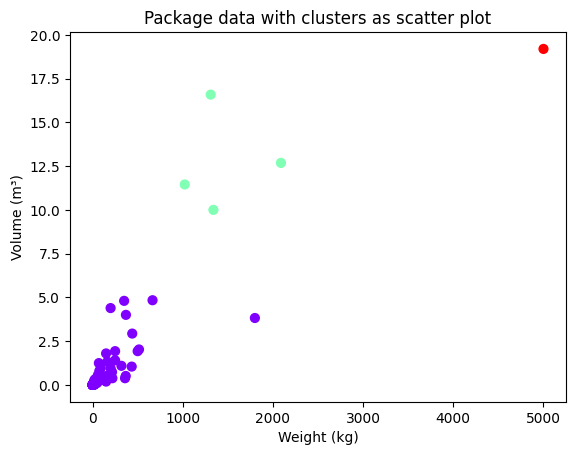

In [137]:
# Daten visualisieren: Merkmale
scatter(x["Gross Weight (kg)"].to_numpy(), x["Volume (m³)"].to_numpy(), c=y_cluster_man, s=40, cmap='rainbow')

title("Package data with clusters as scatter plot")
xlabel("Weight (kg)")
ylabel("Volume (m³)")
# legend()

In [138]:
# Texterkennung?